# SIMPLE RESEAU DE NEURONE SANS COUCHES CACHEES

# On crée le modèle

Le modèle le plus simple avec une entrée et une sortie

In [1]:
import torch.nn as nn

class Model(nn.Module):
    def __init__(self):
        super(Model, self).__init__()
        self.linear = nn.Linear(1, 1) 

    def forward(self, x):
        return self.linear(x)


In [2]:
model = Model()

# On définit les paramètres d'apprentissage

In [3]:
# Learning rate
lr = 0.1

In [4]:
import torch.optim as optim

criterion = nn.MSELoss()  # Mean Squared Error loss
optimizer = optim.Adam(model.parameters(), lr=lr)  # Adam optimizer

# La fonction fit()

In [5]:
import torch

def fit(inputs, targets):
    input_tensor = torch.tensor(inputs, dtype=torch.float)
    target_tensor = torch.tensor(targets, dtype=torch.float)

    optimizer.zero_grad()  # Reset gradients
    outputs = model(input_tensor)  # Forward pass
    loss = criterion(outputs, target_tensor)  # Compute loss
    loss.backward()  # Backpropagation
    optimizer.step()  # Update weights

    print(f"Loss: {loss.item():.6f}")


# On entraine le modèle

Entrainer jusqu'a obtenir une loss < 0.2

In [29]:
fit([2], [1])
fit([3], [0])

Loss: 0.757246
Loss: 0.239863


# La fonction predict()

In [30]:
def predict(input):
    input_tensor = torch.tensor(input, dtype=torch.float)
    output_tensor = model(input_tensor)
    print(output_tensor.detach().numpy())

# On affiche les prédictions

In [31]:
predict([2])
predict([3])

[0.13364607]
[0.47243625]


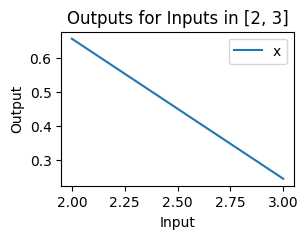

In [3241]:
import matplotlib.pyplot as plt

# Generate inputs in the range [2, 3]
inputs = torch.linspace(2, 3, steps=100).unsqueeze(1)  # Shape (100,1)

outputs = model(inputs)

# Extract the first output value for each input
output_x = outputs.detach().numpy()  # Detach and convert to NumPy

# Plot results
plt.figure(figsize=(3, 2))
plt.plot(inputs.numpy(), output_x, label="x")
plt.xlabel("Input")
plt.ylabel("Output")
plt.title("Outputs for Inputs in [2, 3]")
plt.legend()
plt.show()